In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [235]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(data=np.c_[iris["data"],iris["target"]],columns=iris["feature_names"]+["target"])

In [236]:
def fit(iris_df,target):
    class_1 = iris_df[iris_df["target"]==target].copy()
    class_1["target"] = class_1["target"].apply(lambda x: 1.0)
    class_2 = iris_df[iris_df["target"]!=target].copy()
    class_2["target"] = class_2["target"].apply(lambda x: -1.0 )
    class_1_x = class_1.iloc[:, :-1]
    class_1_y = class_1.iloc[:, -1:]
    class_2_x = class_2.iloc[:, :-1]
    class_2_y = class_2.iloc[:, -1:]
    class_1_x_train, class_1_x_test, class_1_y_train, class_1_y_test = train_test_split(class_1_x, class_1_y, test_size=0.2, random_state=0,shuffle=True)
    
    class_2_x_train, class_2_x_test, class_2_y_train, class_2_y_test = train_test_split(class_2_x, class_2_y, test_size=0.2, random_state=0,shuffle=True)
    
    x_train = np.concatenate((class_1_x_train,class_2_x_train), axis=0)
    x_test = np.concatenate((class_1_x_test,class_2_x_test), axis=0)
    y_train = np.concatenate((class_1_y_train,class_2_y_train), axis=0)
    y_test = np.concatenate((class_1_y_test,class_2_y_test), axis=0)
    x_train = np.concatenate((np.ones((x_train.shape[0], 1)),x_train), axis=1)
    x_test = np.concatenate((np.ones((x_test.shape[0], 1)),x_test), axis=1)
    return  np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train), x_test, y_test

In [237]:
def predict(x_test, weight):
    y_pred = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        if x_test[i].dot(weight) > 0:
            y_pred[i] = 1.0
        else:
            y_pred[i] = -1.0
    return y_pred
        

In [238]:
weight_1,x_test,y_test = fit(iris_df,0.0)
print("Class 1 Model Accuracy: ",int(accuracy_score(y_test, predict(x_test, weight_1))*100),"%")
weight_2,x_test,y_test = fit(iris_df,1.0)
print("Class 2 Model Accuracy: ",int(accuracy_score(y_test, predict(x_test, weight_2))*100),"%")
weight_3,x_test,y_test = fit(iris_df,2.0)
print("Class 3 Model Accuracy: ",int(accuracy_score(y_test, predict(x_test, weight_3))*100),"%")

Class 1 Model Accuracy:  100 %
Class 2 Model Accuracy:  73 %
Class 3 Model Accuracy:  100 %


In [239]:
import random


def linear_eq(x):
    return 3*x + 2

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent(x, y, rate=0.01, iterations=100):
    weight = random.random()
    bias = random.random()

    for i in range(iterations):
        y_pred = weight * x + bias

        d_weight = (-2/len(x)) * np.sum(x * (y - y_pred))
        d_bias = (-2/len(x)) * np.sum(y - y_pred)

        weight -= rate * d_weight
        bias -= rate * d_bias

    return weight, bias


Best fit line equation: y = 3.15x + 1.80
Mean Squared Error: 0.26763971563605893


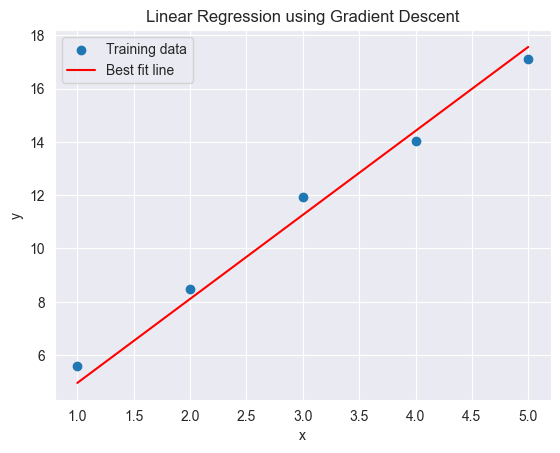

In [240]:
x_values = np.array([1, 2, 3, 4, 5])

y_values = linear_eq(x_values)

noise = np.random.uniform(0, 1, size=len(x_values))
y_values_with_noise = y_values + noise

weight, bias = gradient_descent(x_values, y_values_with_noise)

print(f"Best fit line equation: y = {weight:.2f}x + {bias:.2f}")

predicted_y = weight * x_values + bias

mse = mean_squared_error(y_values_with_noise, predicted_y)
print("Mean Squared Error:", mse)

plt.scatter(x_values, y_values_with_noise, label="Training data")
plt.plot(x_values, predicted_y, color="red", label="Best fit line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()
